# Исследование объявлений о продаже квартир

В нашем распоряжении данные онлайн сервиса по продаже недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача проекта — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### 1 Загрузка и изучение данных. 

**1. Импортируем библиотеку pandas. Загружаем данные из csv-файла в датафрейм в учетом типа разделителя данных и сохраняем в переменную `data`.**

In [358]:
import pandas as pd  # импортируем библиотеку pandas

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # читаем csv-файл и сохраняем в переменную data
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t') 

data.head()  # смотрим первые 5 строк данных

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**2. Изучим основную информацию о датафрейме с помощью метода `info()`**

In [359]:
data.info() # смотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** Есть пропуски в данных, ими мы займемся позже. С наименованиями столбцов в основном все нормально, но в одном замечен camel case - заменим на snake case.

In [360]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) # в наименовании одного из столбцов обнаружен camel case - меняем на snake
data.head() # проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**3. Для лучшей наглядности построим общую гистограмму с помощью метода `hist()`.**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

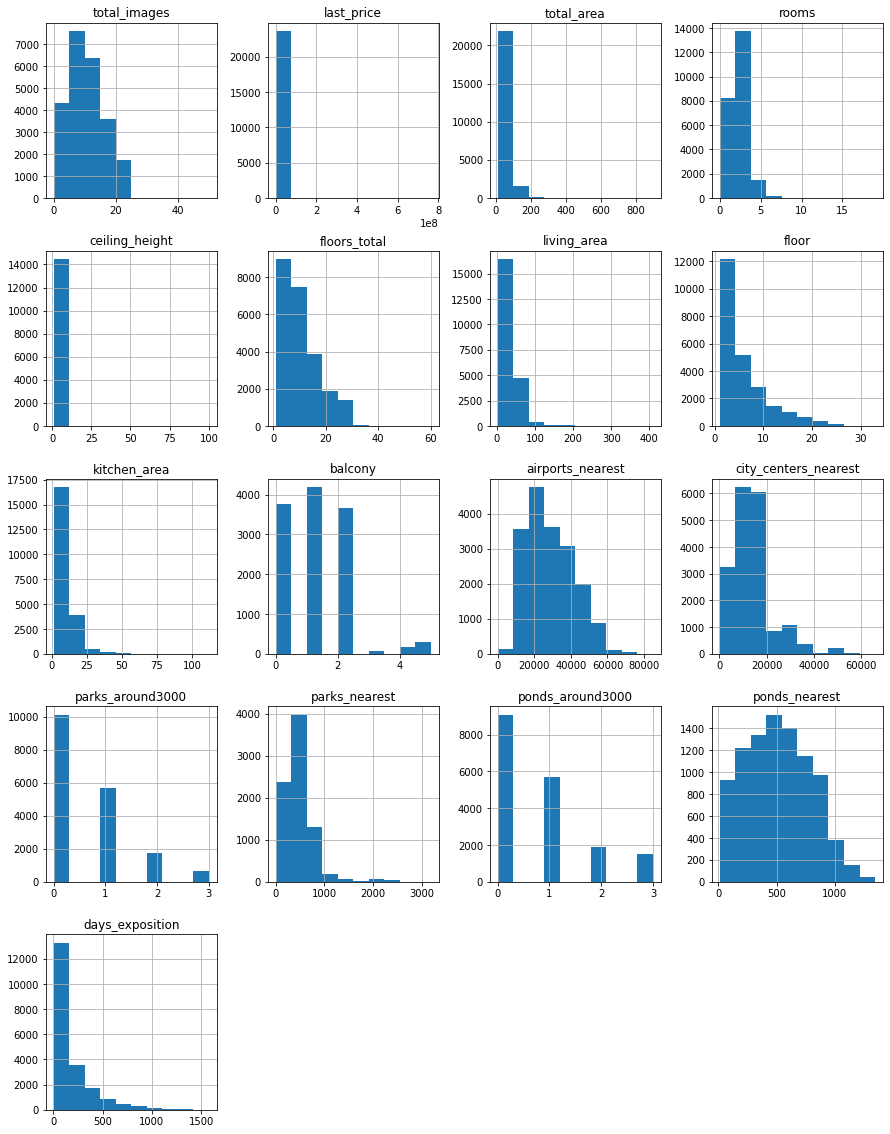

In [361]:
data.hist(figsize=(15, 20)) # строим общую гистограмму для всех числовых данных датасета

**Вывод:** По беглому взгляду на гистограммы бросается в глаза, что в параметрах "last_price", "total_area"(а соответственно и связанных "kitchen_area" и "living_area"), "ceiling_height" присутствуют редкие большие значения, сильно отличающиеся от основной массы, возможно это выбросы, ошибки, аномалии - будем разбираться.

**4. Изучим период, за который были собраны данные**

In [362]:
data['first_day_exposition'].min(), data['first_day_exposition'].max() # посмотрим за какой период у нас данные

('2014-11-27T00:00:00', '2019-05-03T00:00:00')

**Вывод:** По разнице между минимальным и максимальным значением даты публкации видим, что у нас данные примерно за 4.5 года с конца ноября 2014 по начало мая 2019 года. Санкции уже привели к скачку курса доллара и в рамках наблюдаемого диапазона, резкого роста цен в рублях, не связанного с событиями на самом рынке недвижимости, не должно было возникнуть.

### 2 Предобработка данных

**1. Найдем и изучим пропущенные значения в столбцах**

In [363]:
data.isna().sum()
data.isna().mean()*100 # изучим количества пропусков значений по столбцам (домножил на 100, чтобы было красивее (т.е. в %))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**Вывод:** Пропуски в таких столбцах, как балконы или является ли объект апартаментами скорее всего соответствуют отсутствию балконов и статуса (в случае с апартаментами это еще косвенно подтверждается низкой долей апартаментов среди объектов ими не являющихся). Заменим пропуски на 0 и False (по сути тоже 0).

In [364]:
data['balcony'] = data['balcony'].fillna(value=0) # пропуски заменяем на 0 (см. выводы выше)
data['is_apartment'] = data['is_apartment'].fillna(value=False) # пропуски заменяем на False (см. выводы выше)

**Вывод:** Аналогично поступим с пропусками в столбцах с кол-вом парков и водоемов в радиусе 3км - пропуск, по логике, обозначает отсутствие таковых. Если только в строках с пропусками нет соответствующей информации по расстоянию до ближайших парков/водоемов. Однако в этих строках тоже пропуски данных. С другой стороны среди строк с пропущеными данными по расстоянию до ближайших парков/водоемов примерно 2/3 - это 0 парков/водоемов в радиусе 3км и 1/3 пропуски. Заменяем пропуски в столбцах с 3км радиусами на 0. Пропусков же в столбцах с расстояниями до парка/водоема слишком много и о них можно лишь сделать вывод, что они все, скорее всего, свыше 3000м. Это можно будет учесть при категоризации данных о расстояниях, если она потребуется для дальнейшего анализа. 

In [365]:
data.loc[data['parks_around3000'].isna(), 'parks_nearest'].value_counts(dropna=False) # проверяем, нет ли данных о расстоянии в другом столбце
data.loc[data['ponds_around3000'].isna(), 'ponds_nearest'].value_counts(dropna=False) # проверяем, нет ли данных о расстоянии в другом столбце

data.loc[data['parks_nearest'].isna(), 'parks_around3000'].value_counts(dropna=False)
data.loc[data['ponds_nearest'].isna(), 'ponds_around3000'].value_counts(dropna=False)

data['parks_around3000'] = data['parks_around3000'].fillna(value=0) 
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

NaN    5518
Name: parks_nearest, dtype: int64

NaN    5518
Name: ponds_nearest, dtype: int64

0.0    10102
NaN     5518
Name: parks_around3000, dtype: int64

0.0    9071
NaN    5518
Name: ponds_around3000, dtype: int64

**Вывод:** Что касается пропусков в столбце с наименованиями населенных пунктов (пропуски составляют 0.2% от всех строк, эти данные потребуются нам для исследования), то на практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся заполнить эти пропуски явными обозначениями и оценить, насколько они повредят расчётам.

In [366]:
data['locality_name'] = data['locality_name'].fillna('unknown')

**Вывод:** Также пропуски есть в столбцах с данными о высоте потолка (39% строк), общем кол-ве этажей в здании (0.4%), жилой площади (8%), площади кухни (10%), расстояних до ближайших аэропорта (23%), центра города (23%), парка (66%), водоема (62%) и количестве дней публикации объявления (13%). О расстояниях до парков и водоемов уже сказано выше. Что касается высоты потолков и других числовых данных, то нужно сначала получше изучить их самих и возможные взаимосвязи, тогда можно будет рассмотреть возможность заполнения еще каких-то из пропусков.

In [367]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2. Рассмотрим типы данных в столбцах**

In [368]:
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [369]:
data.info()   # выводим информацию о типах данных по столбцам
data['balcony'] = data['balcony'].astype(int)  # из-за пропусков тип данных в столбцах был с плавающей точкой
data['parks_around3000'] = data['parks_around3000'].astype(int) # в столбцах, где мы ранее заполнили пропуски
data['ponds_around3000'] = data['ponds_around3000'].astype(int) # можно поменять тип данных на целочисленный
# тип данных в столбце с датами размещения объявлений следует сменить на datetime, чтобы в дальнейшем совершать операции с ними
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# например округлим даты до дней, так как время размещения объявления не так важно для целей исследования
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1d')

#pd.to_numeric(data['last_price'], errors='coerce')

data['last_price'] = data['last_price'].astype(int) # правим тип данных с ценами на целочисленный (после комментария ревьюера)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Вывод:** Из-за пропусков тип данных в столбцах о балконах, а также парках и водоемах в 3км радиусе был с плавающей точкой. Теперь, когда мы заполнили пропуски, можно это поправить и сделать тип целочисленным (кол-ва балконов, парков и водоемов представлены целыми числами). Если позже заполним пропуски в других столбцах, где данные отображают целые числа, то можно будет изменить тип и там.
Тип данных в столбце с датами размещения объявлений следует сменить на datetime, чтобы в дальнейшем совершать операции с ними (например округлять или выделить день недели или год). Мало кто продаёт квартиру с копейками в цене, тип столбца 'last_price' правим на целочисленный.

In [370]:
data.info() # снова выводим информацию о датасете для контроля изменений типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [371]:
data.head() # чтобы убедиться в правильном отображении даты после округления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


**3. Изучим значения в столбце с названиями населенных пунктов на предмет неявных дубликатов**

In [372]:
data['locality_name'].sort_values().unique()
data['locality_name'].value_counts()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Санкт-Петербург                                      15721
посёлок Мурино                                         522
посёлок Шушары                                         440
Всеволожск                                             398
Пушкин                                                 369
                                                     ...  
поселок Почап                                            1
посёлок при железнодорожной станции Приветнинское        1
поселок Тёсово-4                                         1
деревня Куровицы                                         1
поселок Калитино                                         1
Name: locality_name, Length: 365, dtype: int64

In [373]:
duplicates = ['садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'деревня ', 'городской поселок ', 'городской посёлок ', 'поселок городского типа ', 'посёлок городского типа ', 'поселок ', 'посёлок ', 'село ', 'при железнодорожной станции ', 'станции ', 'коттеджный ', 'имени ']
for duplicate in duplicates:
    data['locality_name'] = data['locality_name'].str.replace(duplicate,'')

data['locality_name'].sort_values().unique()
data['locality_name'].value_counts()

array(['unknown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Петро-Славянка         1
Свирьстрой             1
Хязельки               1
Снегирёвка             1
Трубников Бор          1
Name: locality_name, Length: 306, dtype: int64

**Вывод:** Убрали 59 неявных дубликатов (365 - 306). Например Кудрово вообще не было в топе упоминаний, видимо было сильно разделено между разными написаниями ("деревня Кудрово" и просто "Кудрово"). Теперь распределения будут отображены корректнее.

**4. Найдем и устраним аномалии в данных**

In [374]:
data.describe() # отобразим информацию о распределении данных в числовых столбцах

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Максимальное значение высоты потолка в 100м немного беспокоит, разберемся с этим столбцом поподробнее:**

(1.0, 14.0)

<AxesSubplot:>

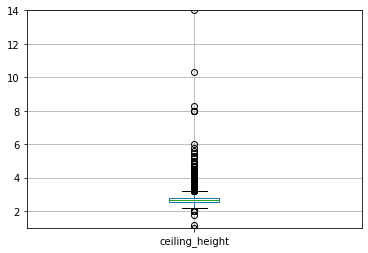

In [375]:
import matplotlib.pyplot as plt
plt.ylim(1, 14)
data.boxplot(column='ceiling_height')  

<AxesSubplot:>

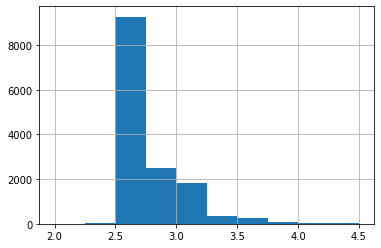

In [376]:
data['ceiling_height'].hist(range=(2, 4.5))

**Вывод:** Большинство значений, обозначающих высоту потолка сосредоточены в диапазоне от 2.2 до 4.5м, однако есть заметное на "ящике с усами" количество значений и до 6м и даже есть значения в районе 8, 10, 14м. Изучим уникальные значения свыше 4.5 м и ниже 2м (эти точно аномальные, учитывая рост человека). 

In [377]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 4.5), 'ceiling_height'].value_counts() #.reset_index()

27.00     8
25.00     7
8.00      3
4.70      2
5.30      2
32.00     2
14.00     1
4.80      1
4.65      1
1.20      1
6.00      1
8.30      1
100.00    1
5.60      1
5.80      1
5.50      1
20.00     1
5.20      1
10.30     1
1.75      1
5.00      1
26.00     1
4.90      1
22.60     1
27.50     1
24.00     1
1.00      1
Name: ceiling_height, dtype: int64

**Вывод:** По высотам потолков 25 м и 32 м и т.п. логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м и т.п. Так как есть несколько значений в районе 10м, то предположим, что и явная аномалия в 100м также требует деления на 10. 

In [378]:
max_ceiling_height = 14

# запрос (логическое выражение для отбора нужных строк): 
q_ceiling_is_too_high = data.ceiling_height > max_ceiling_height

# корректируем значения
data.loc[q_ceiling_is_too_high, 'ceiling_height'] = data.loc[q_ceiling_is_too_high, 'ceiling_height'] / 10

In [379]:
data.loc[data['ceiling_height'] > 4.5, 'ceiling_height'].value_counts() # проверяем результат

8.00     3
4.70     2
5.30     2
5.00     1
5.80     1
10.30    1
5.50     1
5.20     1
10.00    1
14.00    1
5.60     1
4.90     1
8.30     1
6.00     1
4.80     1
4.65     1
Name: ceiling_height, dtype: int64

**Вывод:** Что касается высот потолков ниже 2м (1, 1.2, 1.75) - они явно не совместимы с реальной жизнью, поэтому такие значения удалим.

In [380]:
data = data[(data['ceiling_height'] != 1) & (data['ceiling_height'] != 1.2) & (data['ceiling_height'] != 1.75)]
#data = data.query('ceiling_height >=2') 

In [381]:
data.loc[(data['ceiling_height'] < 2), 'ceiling_height'].value_counts() # проверяем удаление строк

Series([], Name: ceiling_height, dtype: int64)

**Еще немного работы с пропусками, после того, как мы удалили аномалии в столбце с высотой потолков:**

Средняя высота потолков может разниться, исходя из типа застройки в разных населенных пунктах, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца locality_name. 

In [382]:
# Можно было бы предположить, что высота потолков более всего зависит от расстояния до центра СПб (так как там, как правило, высокие потолки), однако топ 50 ниже это опровергает.
# Но тут важно понимать, что в СПб очень большое кол-во объектов и даже при большом (относительно пригорода) кол-ве домов с высокими потолками медиана всё равно будет ниже, так как гораздо большее кол-во домов строились по советским стандартам 
# Можно было бы для дальнейших целей использовать медианы по каждому нас. пункту, но, к сожалению, выборки по некоторым слишком малы, поэтому следует укрупнить группы

data.groupby('locality_name')['ceiling_height'].agg(['count', 'median']).sort_values('median', axis=0, ascending=False).head(50)
#первый вариант медианы для заполнения пропусков
median_of_each_town_median = data.groupby('locality_name')['ceiling_height'].median().median()
median_of_each_town_median
#второй вариант медианы для заполнения пропусков
data['ceiling_height'].median()
#третий вариант медианы для заполнения пропусков
suburbs_median = data.loc[data['locality_name'] != "Санкт-Петербург", 'ceiling_height'].median()
bigcity_median = data.loc[data['locality_name'] == "Санкт-Петербург", 'ceiling_height'].median()
bigcity_suburbs_median = (suburbs_median + bigcity_median) / 2
bigcity_suburbs_median

,count,median
locality_name,,
Бокситогорск,2,3.900
Ропша,1,3.200
Ваганово,2,3.150
Глинка,2,3.100
Счастье,1,3.000
Каськово,1,3.000
Бор,1,2.950
unknown,14,2.875
Лисий Нос,2,2.850


2.55

2.65

2.6500000000000004

In [383]:
# добавил для наглядности примеры самой сильной линейной связи между высотой потолков и другими параметрами из датасета

data['ceiling_height'].corr(data['total_area'])
data['ceiling_height'].corr(data['city_centers_nearest'])
data['ceiling_height'].corr(data['last_price'])

0.4166944433367784

-0.31875352603975704

0.3480064530249608

In [384]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == t), 'ceiling_height'].median()

In [385]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             95
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5541
city_centers_nearest     5518
parks_around3000            0
parks_nearest           15618
ponds_around3000            0
ponds_nearest           14588
days_exposition          3181
dtype: int64

**Минимальное значение в столбце с кол-вом комнат 0 тоже вызывает озабоченность, изучим подробнее:**

In [386]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [387]:
data.groupby('rooms').agg({'total_area': ['count', 'median'], 'studio': ['sum', 'mean']})
data['studio'].sum()

total_area         studio          
           count  median    sum      mean
rooms                                    
0            197   26.05    138  0.700508
1           8046   36.53     11  0.001367
2           7938   53.00      0  0.000000
3           5814   73.00      0  0.000000
4           1180   99.30      0  0.000000
5            326  146.45      0  0.000000
6            105  184.30      0  0.000000
7             59  214.00      0  0.000000
8             12  235.70      0  0.000000
9              8  300.95      0  0.000000
10             3  272.60      0  0.000000
11             2  188.90      0  0.000000
12             1  900.00      0  0.000000
14             2  304.20      0  0.000000
15             1  590.00      0  0.000000
16             1  270.00      0  0.000000
19             1  374.60      0  0.000000

149

138 из 197 строк с 0 комнат имеют признак True в столбце "студия". Возможно таким образом (через 0 комнат пытались обозначить студию)

In [388]:
data.duplicated().sum() # подсчёт явных дубликатов

0

**Вывод:** Дубликатов нет, идем дальше.

### 3 Добавление в таблицу новых столбцов

Добавим в таблицу новые столбцы для дальнейшего исследования зависимостей

In [389]:
data['sqm_price'] = (data['last_price'] / data['total_area']).round(2) # цена за квадратный метр
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday # день недели публикации: 0-пнд, 1-вт и т.д.
data['month_exposition'] = data['first_day_exposition'].dt.month # месяц публикации (1-январь и т.д.)
data['year_exposition'] = data['first_day_exposition'].dt.year # год публикации

#для категоризации данных об этаже создадим функцию (так как требуются данные из 2 разных столбцов - функция будет перебирать строки)
def categorize_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        return 'unknown'
    
data['floor_category'] = data.apply(categorize_floor, axis=1) # тип этажа (1й, последний или другой)
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).round() # расстояние до центра в км

In [390]:
data.head() # проверяем корректность добавления столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


### 4 Исследовательский анализ данных

**1.  Подробнее изучим параметры объектов**

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров. 

count    23696.000000
mean        60.350476
std         35.655896
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

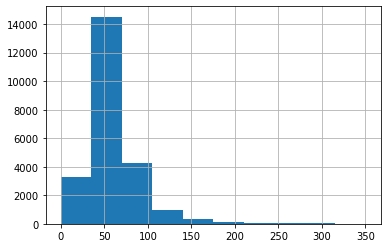

<AxesSubplot:>

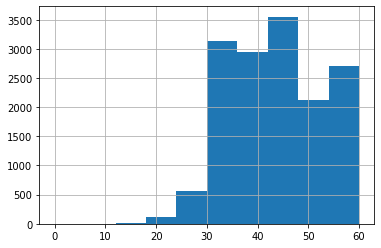

<AxesSubplot:>

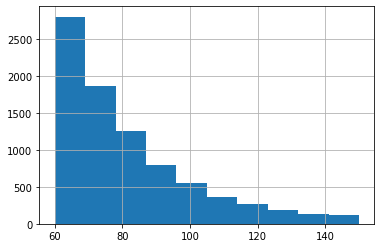

In [391]:
import matplotlib.pyplot as plt

data['total_area'].describe()
data['total_area'].hist(range=(0, 350))
plt.show()
data['total_area'].hist(range=(0, 60))
plt.show()
data['total_area'].hist(range=(60, 150))

**Вывод:** Большая часть объявлений сосредоточена на площадях 30 до 80 квадратных метров. До 30 метров объявлений достаточно мало, что немного удивляет на фоне новостроек, заполненных студиями. Возможно в датасете только объявения по вторичке, а переуступки и подобное не учитываются. Квадратуры свыше 80 встречаются достаточно часто, но с ростом площади все менее и менее распространены. Где-то от 175 - 200 кв.м вправо тянется длинный хвост редких значений/аномалий.

count    21793.000000
mean        34.459049
std         22.031604
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

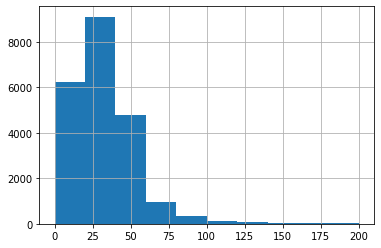

<AxesSubplot:>

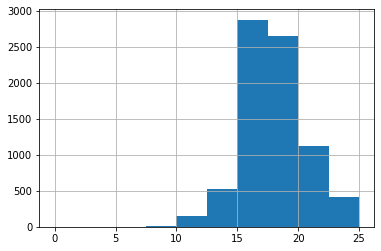

<AxesSubplot:>

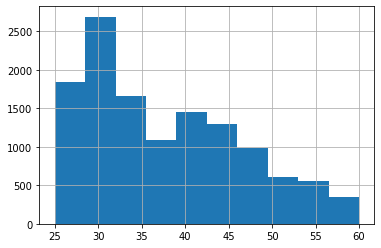

0.9395372164632472

0.428663236842772

In [392]:
data['living_area'].describe()
data['living_area'].hist(range=(0, 200))
plt.show()
data['living_area'].hist(range=(0, 25))
plt.show()
data['living_area'].hist(range=(25, 60))
plt.show()
data['living_area'].corr(data['total_area'])
data['living_area'].corr(data['kitchen_area'])

**Вывод:** Большая часть объявлений сосредоточена на жилых площадях от 15 до 60 квадратных метров. До 15 метров объявлений достаточно мало, до 10м - скорее аномалии. Локальные пики в районе 30 и 40-45м возможно связаны с типовыми квадратурами жил пдощади при разных планировках/кол-вах комнат. Где-то от 120 - 140 кв.м вправо тянется длинный хвост редких значений/аномалий. Изучили линейную взаимосвязь жилой площади с общей и площадью кухни. У жилой лощади и общей уровень корреляции близкий к 1, что говорит о том, что при увеличении общей площади практически пропорционально растет площадь жилых помещенй, то есть в большинстве случаев рост общей площади означает соответствующий рост жилой площади, а вот площадь кухни у больших квартир не всегда будет выше, чем у более скромных (это логично, ведь в типовых домах есть вариации 1, 2, 3 и т.д. квартир, при этом планировка кухни у них может быть одинаковой). Поэтому корреляция между жилой и кухонной площадью менее 0.5.

count    21418.000000
mean        10.570189
std          5.905717
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

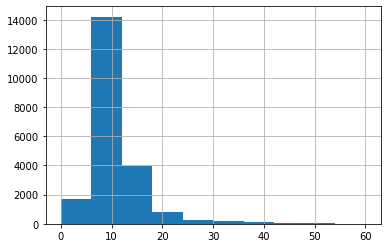

<AxesSubplot:>

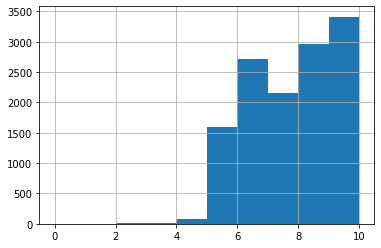

<AxesSubplot:>

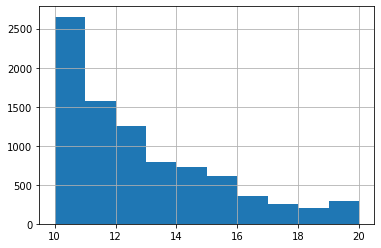

0.6091112575055264

In [393]:
data['kitchen_area'].describe()
data['kitchen_area'].hist(range=(0, 60))
plt.show()
data['kitchen_area'].hist(range=(0, 10))
plt.show()
data['kitchen_area'].hist(range=(10, 20))
plt.show()
data['kitchen_area'].corr(data['total_area'])

**Вывод:** Большая часть объявлений сосредоточена на жилых площадях от 6 до 16 квадратных метров. С 4 до 5 метров объявлений достаточно мало, но они есть, а до 4м - скорее аномалии. Где-то от 40 кв.м вправо тянется длинный хвост редких значений/аномалий. Как описано в выводе по площади жилых помещений, рост площади кухни менее линейно связан с ростои общей площади, что показывает корреляция в районе 0.6. Что также наводит на мысль о том, что у нас могут быть в теории 2 идентичные по прочим характеристикам (локации, кол-ву комнат и т.п.) квартиры с одинаковой общей площадью, но при этом доля этой площади, относящаяся к кухне у одной из квартир может быть больше и скорее всего квадратный метр такой квартиры будет цениться выше. Вернемся к этому предположению позже при изучении факторов, влияющих на цену квартиры.

count    2.369600e+04
mean     6.541887e+06
std      1.088764e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

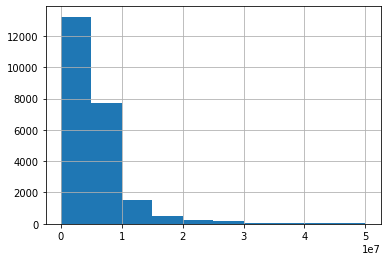

<AxesSubplot:>

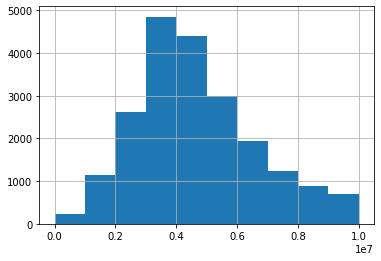

<AxesSubplot:>

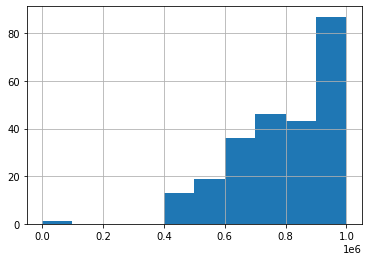

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_km
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,805.0,0,NaN,8.0,111.83,2,3,2019,последний,9.0


8793    Санкт-Петербург
Name: locality_name, dtype: object

In [394]:
data['last_price'].describe()
data['last_price'].hist(range=(0, 5e7))
plt.show()
data['last_price'].hist(range=(0, 1e7))
plt.show()
data['last_price'].hist(range=(0, 1e6))
plt.show()
data.query('last_price < 4e5')
data.loc[data['last_price'] < 4e5, 'locality_name']

**Вывод:** Большая часть объявлений сосредоточена на ценах от 2 до 7 млн. руб. Цены до 2млн. встречаются реже, начинаясь от 400000, а вот возле нуля явно какой-то выброс/аномалия - изучим поподробнее. Оказывается это всего 1 объявление и с ним очевидно что-то не так - бело бы целесообразным направить его в качестве примера для баг-репорта коллегам. Цена всего 12190 руб., что нереально. При этом общая площадь 109 кв.м, 2 комнаты, Санкт-петербург, 9км от центра. Можно было бы предположить, что это опечатка и указана цена за метр (правда даже ее надо умножить на 10 для реалистичности), либо указана цена не в руб. а в тыс. руб., такое тоже встречается иногда. Можно рассмотреть медианы значений цен по известным нам характеристикам данной квартиры, чтобы оценить правдоподобность ошибки. Где-то от 30 млн. вправо тянется длинный хвост редких значений/аномалий.

count    23696.000000
mean         2.070687
std          1.078450
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

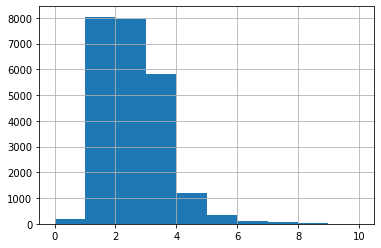

<AxesSubplot:>

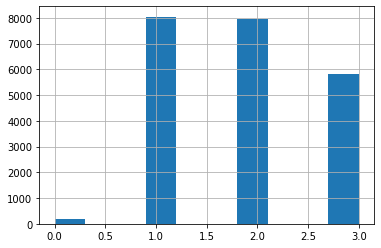

In [395]:
data['rooms'].describe()
data['rooms'].hist(range=(0, 10))
plt.show()
data['rooms'].hist(range=(0, 3))

**Вывод:** Большая часть объявлений сосредоточена на квартирах от 1 до 4 комнат. Есть небольшой выброс в 0 комнат, но мы рассматривали этот вопрос ранее и скорее всего большую часть этих квартир можно перевести в 1 комнатные (студии), либо удалить, так как доля их невелика. Где-то от 6-7 комнат вправо тянется хвост редких значений/аномалий.

count    23601.000000
mean         2.706082
std          0.257324
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

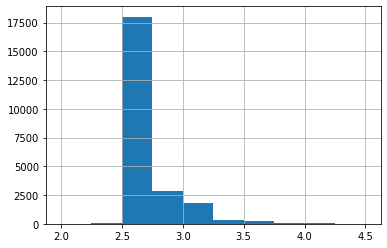

<AxesSubplot:>

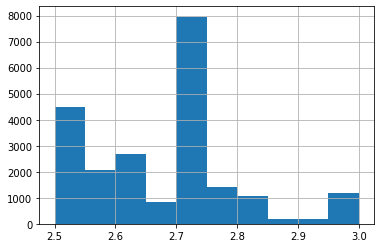

In [396]:
data['ceiling_height'].describe()
data['ceiling_height'].hist(range=(2, 4.5))
plt.show()
data['ceiling_height'].hist(range=(2.5, 3))

**Вывод:** Большая часть объявлений сосредоточена на квартирах со стандартными более менее современными потолками: от 2.5м до 2.75. Совсем крупные или наоборот мелкие аномалии мы удалили ранее. Где-то от 3.5м вправо до значения в 14м тянется хвост редких значений/аномалий.

count    23696.000000
mean         5.892556
std          4.885446
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

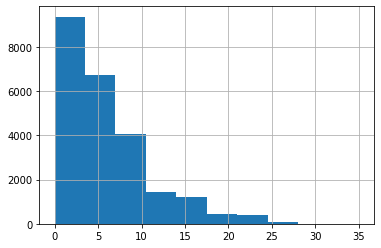

<AxesSubplot:>

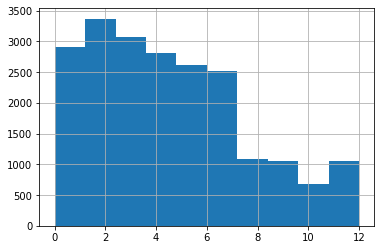

<AxesSubplot:>

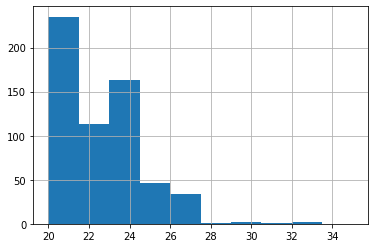

In [397]:
data['floor'].describe()
data['floor'].hist(range=(0, 35))
plt.show()
data['floor'].hist(range=(0, 12))
plt.show()
data['floor'].hist(range=(20, 35))

**Вывод:** Большая часть объявлений сосредоточена на квартирах в домах со стандартными позднесоветскими или новыми девелоперскими этажностями: от 1 до 10 этажей. Этажности свыше 10 пока что не занимают и 10%, но девелоперы работают над этим, строя дома-миллионники. Где-то от 28 этажей вправо тянется хвост редких значений/аномалий.

count      23696
unique         3
top       другой
freq       17444
Name: floor_category, dtype: object

<AxesSubplot:>

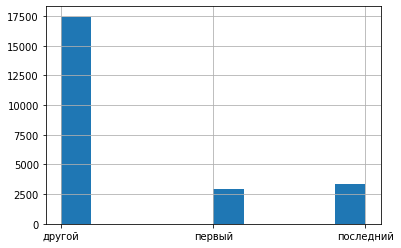

In [398]:
data['floor_category'].describe()
data['floor_category'].hist()

**Вывод:** Большая часть объявлений сосредоточена на квартирах не на первом или последнем этажах: во-первых таких этажей впринципе больше в городах, во-вторых они пользуются большей популярностью. Вариантов с последним этажем несколько больше, чем с первым, но на оба приходится всего по 10% (примерно) объявлений.

count    23610.00000
mean        10.67302
std          6.59512
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         60.00000
Name: floors_total, dtype: float64

<AxesSubplot:>

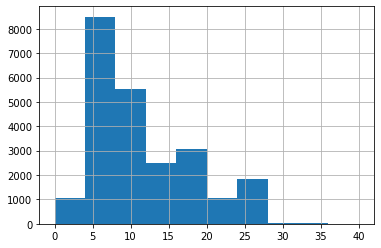

<AxesSubplot:>

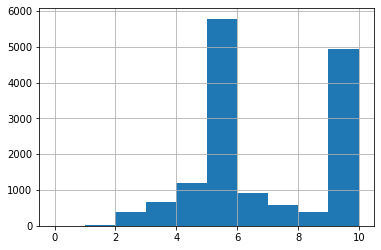

In [399]:
data['floors_total'].describe()
data['floors_total'].hist(range=(0, 40))
plt.show()
data['floors_total'].hist(range=(0, 10))

**Вывод:** Характерные пики на 5 и 9 этажах - самая типовая советская этажность в больших городах, следующие пики на 16 этажах (еще один "привет" союзу) и на +/- 25 (это уже спальный новострой)

count    18178.000000
mean     14190.932446
std       8608.734851
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

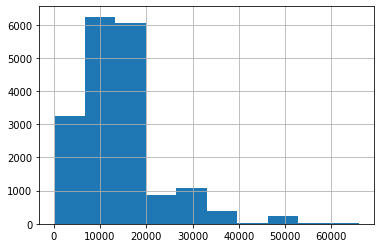

<AxesSubplot:>

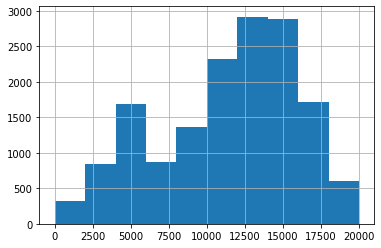

In [400]:
data['city_centers_nearest'].describe()
data['city_centers_nearest'].hist()
plt.show()
data['city_centers_nearest'].hist(range=(0, 2e4))

**Вывод:** В топе варианты "чтобы подешевле, но все еще с метро" (окраина), потом близко к центру, но не центр и пик уже на загородной недвижимости, чтобы подальше от суеты или побюджетнее (кому что)

count    18155.000000
mean     28793.991793
std      12631.316063
min          0.000000
25%      18583.500000
50%      26726.000000
75%      37274.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

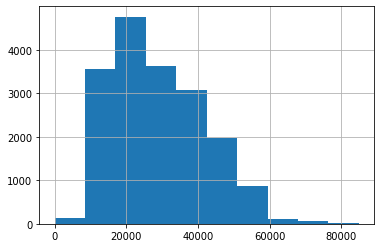

<AxesSubplot:>

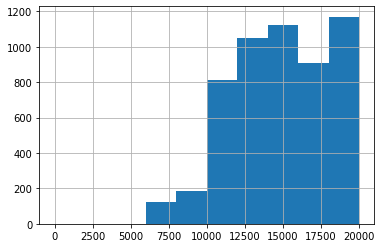

In [401]:
data['airports_nearest'].describe()
data['airports_nearest'].hist()
plt.show()
data['airports_nearest'].hist(range=(0, 2e4))

**Вывод:** Совсем уж близко к аэропорту не стремятся, лучше от 10км в сторону

count    8078.000000
mean      490.829042
std       342.332109
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

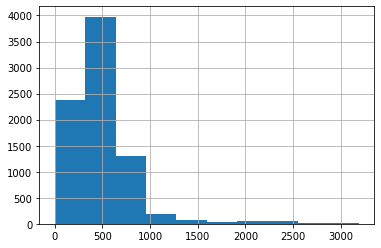

<AxesSubplot:>

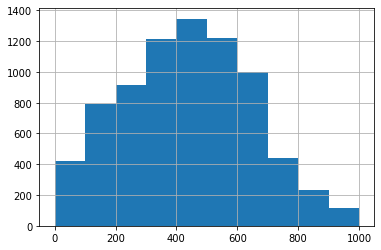

In [402]:
data['parks_nearest'].describe()
data['parks_nearest'].hist()
plt.show()
data['parks_nearest'].hist(range=(0, 1000))

**Вывод:** Пик в районе 500м от парка наиболее распространенная золотая середина между цивилизацией и природой

count    23696.000000
mean         2.569505
std          1.789085
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

<AxesSubplot:>

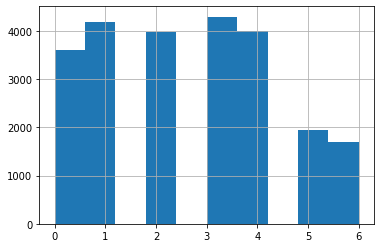

In [403]:
data['weekday_exposition'].describe()
data['weekday_exposition'].hist()

**Вывод:** Видимо на выходных есть дела поважнее у частных лиц, агенства же на выходных, как правило, не работают

count    23696.00000
mean         6.39973
std          3.49161
min          1.00000
25%          3.00000
50%          6.00000
75%         10.00000
max         12.00000
Name: month_exposition, dtype: float64

<AxesSubplot:>

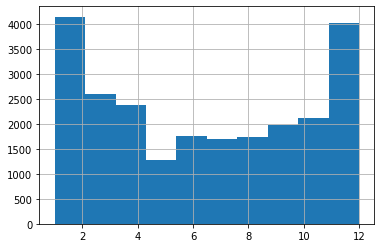

In [404]:
data['month_exposition'].describe()
data['month_exposition'].hist()

**Вывод:** Лично для меня немного удивительный пик на первые месяцы зимы (все-таки новый год, возможно хочется встретить НГ в новом доме или на каникулах появляется время заняться продажей. В остальном понятный спад на майские и лето и постепенный рост осенью

**2.  Изучим, как быстро продавались квартиры**

<AxesSubplot:>

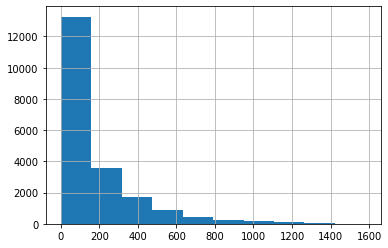

<AxesSubplot:>

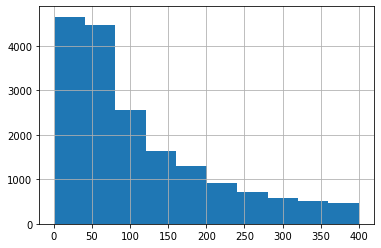

<AxesSubplot:>

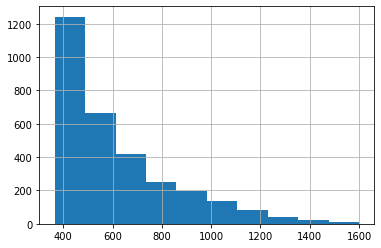

<AxesSubplot:>

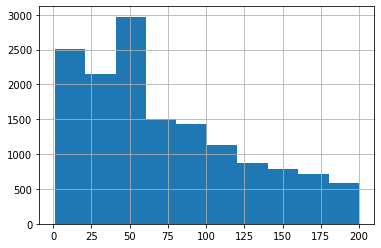

<AxesSubplot:>

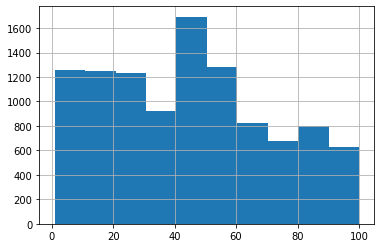

<AxesSubplot:>

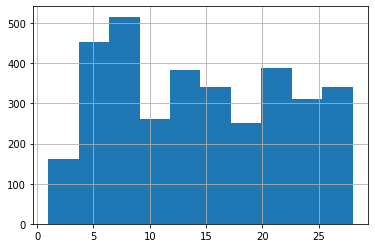

<AxesSubplot:>

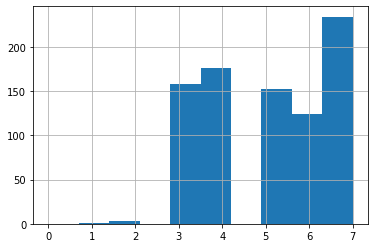

In [405]:
data['days_exposition'].hist()
plt.show()
data['days_exposition'].hist(range=(1, 400))
plt.show()
data['days_exposition'].hist(range=(365, 1600))
plt.show()
data['days_exposition'].hist(range=(1, 200))
plt.show()
data['days_exposition'].hist(range=(1, 100))
plt.show()
data['days_exposition'].hist(range=(1, 28))
plt.show()
data['days_exposition'].hist(range=(0, 7))

In [406]:
data['days_exposition'].describe()

count    20515.000000
mean       180.898903
std        219.739089
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

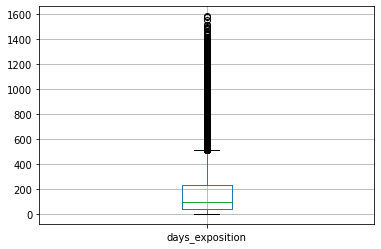

In [407]:
data.boxplot('days_exposition')

In [408]:
data.query('days_exposition > 1000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_km
109,2,7497600,62.5,2015-12-08,2,2.60,5.0,35.5,5,False,...,517.0,0,NaN,1048.0,119961.60,1,12,2015,последний,27.0
353,4,5990000,43.5,2015-05-08,1,3.00,5.0,25.0,4,False,...,93.0,0,NaN,1292.0,137701.15,4,5,2015,другой,10.0
398,7,12789000,79.3,2014-12-09,2,3.00,8.0,43.1,5,False,...,537.0,0,NaN,1345.0,161273.64,1,12,2014,другой,11.0
437,12,3350000,37.0,2015-02-24,1,2.55,6.0,17.8,6,False,...,185.0,1,755.0,1273.0,90540.54,1,2,2015,последний,34.0
459,13,5200000,51.0,2016-03-02,2,2.55,9.0,32.0,5,False,...,NaN,0,NaN,1153.0,101960.78,2,3,2016,другой,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,5,4900000,80.0,2014-12-25,3,2.70,15.0,47.0,14,False,...,NaN,0,NaN,1187.0,61250.00,3,12,2014,другой,NaN
23318,6,5620020,82.3,2015-03-10,3,2.70,21.0,45.6,12,False,...,NaN,1,31.0,1200.0,68287.00,1,3,2015,другой,17.0
23389,6,2850000,40.0,2015-01-26,1,2.60,10.0,19.0,8,False,...,NaN,0,NaN,1012.0,71250.00,0,1,2015,другой,NaN
23426,17,8778000,47.5,2014-12-29,1,3.00,7.0,NaN,4,False,...,1424.0,3,204.0,1360.0,184800.00,0,12,2014,другой,10.0


**Вывод:** Более 50% записей приходятся на время экспозиции от 1 до примерно 160 дней. 3/4 продаж состоятся в пределах 232 дней. Согласно "ящику с усами" значения после 500 дней можно рассматривать в качестве выбросов, однако сильная разница между медианой и средней в верхнюю сторону и жирная непрерывная линия, лежащая за правым "усом", говорят о том, что этих выбросов достаточно значимое кол-во (высокое стандартное отклонение тоже говорит о сильном разбросе данных). Тем не менее, согласно основной гистограмме продаж с экспозицией дольше года уже менее 10%, дольше 1.5 лет - ниже 5%, дольше 2 лет - ниже 2.5%. Что касается аномально быстрых продаж, то это от 1 до 4 дней - менее 1%, однако уже начиная с 5 дней идет рост до 2% и далее до 5-10%. Пик продаж приходится на диапазон 40-60 дней (выше 10% суммарно). Шансы продать квартиру за первй месяц несколько ниже (до 10%), а в последующие после 2х первых месяцы - всё ниже и ниже (5% и ниже). Это всё, естественно, если не учитывать прочие факторы, влияющие на скорость продажи (такие как ликвидность объекта, размер дисконта от рынка и т.п.).

Какие продажи можно считать быстрыми, а какие — необычно долгими?

Если посмотреть на гистограммы и "ящик с усами", то я бы сказал, что аномально быстрые продажи (выбросы) - до 3 дней (почти 0), редкостно быстрые - до 7 дней (менее 1%). Согласно правому "усу" ящика значения выше примерно 500 дней можно рассматривать, как выбросы, а согласно гистограммам все, что выше 1000 дней уже аномально долго, так как и доля таких объявлений падает в район 1%. Вообще долгих объявлений многовато, похоже на какую-то тенденцию, а не выбросы, может быть люди не снимают объявления после продажи или выставляют новые, а старые не удаляют. Если же мы говорим не о фильтрации аномалий, то укрупненно я бы назвал продажи до 2-3 месяцев быстрыми, а более длительные - долгими.

**3.  Сравним, какие факторы больше всего влияют на общую стоимость объекта**

In [409]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,city_centers_km
total_images,1.000000,0.104457,0.115329,0.099261,0.049835,0.010520,0.104748,0.031290,0.010531,-0.029307,...,0.036952,-0.008276,0.011328,-0.003089,-0.026625,0.132739,-0.010503,0.005050,0.140368,-0.047089
last_price,0.104457,1.000000,0.653672,0.363342,0.264562,-0.006974,0.566489,0.026556,0.026956,-0.025364,...,0.197848,-0.016428,0.208684,-0.084890,0.081149,0.736505,0.001513,0.002800,-0.043099,-0.206988
total_area,0.115329,0.653672,1.000000,0.758343,0.343373,-0.075733,0.939537,-0.024779,0.029631,-0.072658,...,0.200220,-0.021520,0.200402,-0.098122,0.149670,0.301951,-0.004748,0.004962,-0.079926,-0.231238
rooms,0.099261,0.363342,0.758343,1.000000,0.204983,-0.228141,0.845974,-0.150879,0.000397,-0.147293,...,0.157493,-0.054567,0.121422,-0.057894,0.126942,0.055422,-0.004176,-0.004422,-0.055434,-0.184344
ceiling_height,0.049835,0.264562,0.343373,0.204983,1.000000,-0.036477,0.328196,-0.013313,0.081675,0.013475,...,0.226286,-0.049989,0.202869,-0.104789,0.094940,0.296323,-0.012805,0.002570,-0.057215,-0.297510
floors_total,0.010520,-0.006974,-0.075733,-0.228141,-0.036477,1.000000,-0.169259,0.678301,-0.026356,0.070187,...,-0.158798,0.097561,-0.049238,0.039637,-0.052134,0.148075,0.013228,0.016500,0.007883,0.018920
living_area,0.104748,0.566489,0.939537,0.845974,0.328196,-0.169259,1.000000,-0.097234,0.026968,-0.056236,...,0.212362,-0.050188,0.182579,-0.081863,0.142442,0.226343,-0.005658,-0.002436,-0.072712,-0.231052
floor,0.031290,0.026556,-0.024779,-0.150879,-0.013313,0.678301,-0.097234,1.000000,-0.013296,0.036938,...,-0.105276,0.073076,-0.029740,0.024840,-0.039447,0.129020,0.012283,0.019406,0.004891,0.008583
is_apartment,0.010531,0.026956,0.029631,0.000397,0.081675,-0.026356,0.026968,-0.013296,1.000000,-0.003658,...,0.021563,-0.033414,0.024413,0.003342,0.015260,0.044725,-0.009497,0.002374,0.009413,0.003557
studio,-0.029307,-0.025364,-0.072658,-0.147293,0.013475,0.070187,-0.056236,0.036938,-0.003658,1.000000,...,-0.032015,0.009130,-0.009680,0.002587,-0.022480,0.015634,-0.000852,0.000985,0.011960,-0.007466


In [410]:
display(pd.qcut(data.total_area,4))

data['area_category'] = pd.qcut(data['total_area'],4,['до 40', 'до 52', 'до 70', 'свыше 70'])

display(data.head())

0         (69.9, 900.0]
1          (40.0, 52.0]
2          (52.0, 69.9]
3         (69.9, 900.0]
4         (69.9, 900.0]
              ...      
23694     (69.9, 900.0]
23695      (52.0, 69.9]
23696      (52.0, 69.9]
23697     (69.9, 900.0]
23698    (11.999, 40.0]
Name: total_area, Length: 23696, dtype: category
Categories (4, interval[float64]): [(11.999, 40.0] < (40.0, 52.0] < (52.0, 69.9] < (69.9, 900.0]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_km,area_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,NaN,120370.37,3,3,2019,другой,16.0,свыше 70
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,0,NaN,81.0,82920.79,1,12,2018,первый,19.0,до 52
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,2,574.0,558.0,92785.71,3,8,2015,другой,14.0,до 70
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,3,234.0,424.0,408176.10,4,7,2015,другой,7.0,свыше 70
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121.0,100000.00,1,6,2018,другой,8.0,свыше 70


In [411]:
data_groupedby_area_category = data.groupby('area_category').agg({'last_price': ['count', 'median']})
data_groupedby_area_category

last_price         
                   count   median
area_category                    
до 40               6041  3300000
до 52               5912  4100000
до 70               5822  5300000
свыше 70            5921  9200000

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

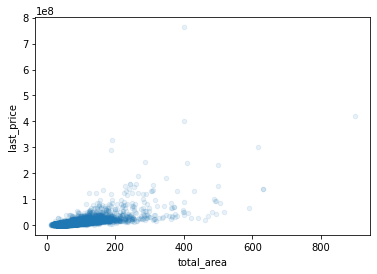

In [412]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)

**Вывод:** Сильнее всего стоимость объекта коррелирует с общей площадью квартиры (коэф. 0.65), логично, что с ростом площади растет цена квартиры (см. также сводную таблицу, где показано как с ростом площади растет и средняя стоимость), однако корреляция ближе к 0.5, чем к 1, так как с ростом площади цена квадратного метра может уменьшаться (действуют более "оптовые" цены).

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

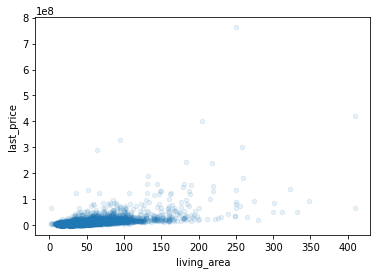

In [413]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)

**Вывод:** Ранее мы уже заметили, что корреляция между жилой и общей площадью объекта близка к 1, поэтому и линейная зависимость общей цены объекта от этих показателей выглядит похожей (0.57 для жилой площади).
Если же говорить о цене квадратного метра, то его зависимость от этих величин значительно ниже (0.3 и 0.22), что означает, что при прочих равных общая и жилая площади в меньшей степени влияют на цену квадратного метра, чем некоторые другие параметры (см. ниже), тем не менее некоторая положительная линейная зависимость есть, то есть с ростом площади растет и цена квадрата, но не пропорционально. Растет скорее всего потому, что квартиры больших площадей обычно строят в домах более высокого класса.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

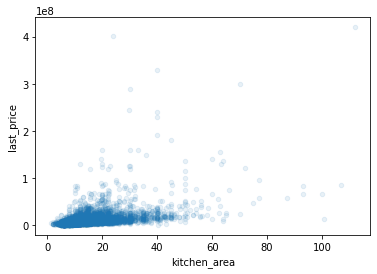

In [414]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1)

**Вывод:** Ранее мы уже заметили, что корреляция между общей и кухонной площадью объекта ниже, чем в случае с жилой площадью (это связано с тем, что количество и площадь жилых комнат может расти, а кухня при этом оставаться неизменной планировки или меняться менее значительно), поэтому и линейная зависимость общей цены объекта от площади кухни несколько ниже (0.52).
А вот если говорить о цене квадратного метра, то его зависимость от площади кухни наоборот, выше, чем от общей и жилой площади и составляет  0.39 (против 0.3 и 0.22). Таким образом, наше предположение на стадии исследования подтвердилось. 

In [415]:
data_groupedby_weekday_exposition = data.groupby('weekday_exposition').agg({'last_price': ['count', 'median']})
data_groupedby_weekday_exposition

last_price         
                        count   median
weekday_exposition                    
0                        3611  4650000
1                        4182  4730000
2                        3973  4700000
3                        4295  4650000
4                        4000  4585000
5                        1936  4555000
6                        1699  4550000

<AxesSubplot:xlabel='weekday_exposition', ylabel='last_price'>

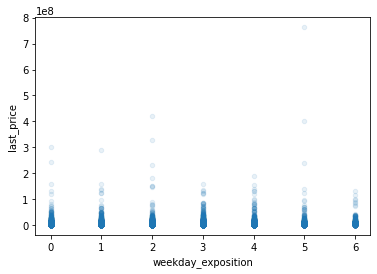

In [416]:
data.plot(x='weekday_exposition', y='last_price', kind='scatter', alpha=0.1)

**Вывод:** Медиана цен выше всего во вторник и снижается с каждым днем к выходным. На выходных уровень самый низкий. В понедельник уровень такой же, как в четверг. Но все эти значения все равно близки. Исходя из таблицы корреляции линейная зависимость цены от дня недели очень мала (0.0015).

In [417]:
data_groupedby_month_exposition = data.groupby('month_exposition').agg({'last_price': ['count', 'median']})
data_groupedby_month_exposition

last_price         
                      count   median
month_exposition                    
1                      1500  4600000
2                      2640  4650000
3                      2587  4650000
4                      2379  4800000
5                      1274  4515000
6                      1760  4400000
7                      1695  4650000
8                      1743  4570000
9                      1981  4700000
10                     2125  4570000
11                     2371  4700000
12                     1641  4700000

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

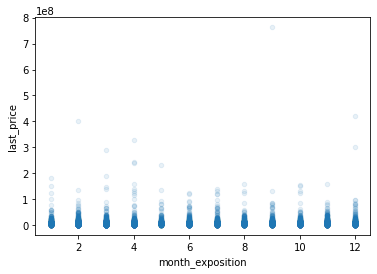

In [418]:
data.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.1)

**Вывод:** Медиана цен выше всего в апреле, чуть пониже идут сентябрь, ноябрь и декабрь. Самые низкие показатели в июне, чуть выше в мае и в августе. В целом же разброс не столь критичен, а линейная связь цены и месяца публикации крайне мала (0.0022). Если же сравнивать, то она есколько выше, чем зависимотсь от дня недели публикации.

In [419]:
data_groupedby_year_exposition = data.groupby('year_exposition').agg({'last_price': ['count', 'median']})
data_groupedby_year_exposition

last_price         
                     count   median
year_exposition                    
2014                   137  7700000
2015                  1191  5350000
2016                  2783  4550000
2017                  8188  4500000
2018                  8518  4550000
2019                  2879  5050000

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

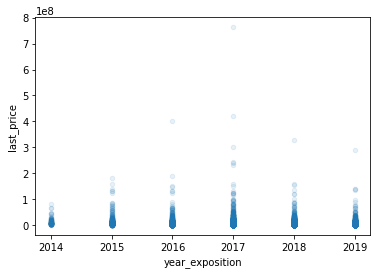

In [420]:
data.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.1)

**Вывод:** 2014 год брать некорректно из-за маленькой выборки, с 2015 по 2017 наблюдалось снижение средней стоимости, а с 2018 началось обратное движение. Корреляция незначительная и отрицательная (-0.043), как раз из-за снижения стоимости с годами.

In [421]:
data_groupedby_floor_category = data.groupby('floor_category').agg({'last_price': ['count', 'median']})
data_groupedby_floor_category

last_price         
                    count   median
floor_category                    
другой              17444  4850000
первый               2916  3900000
последний            3336  4300000

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

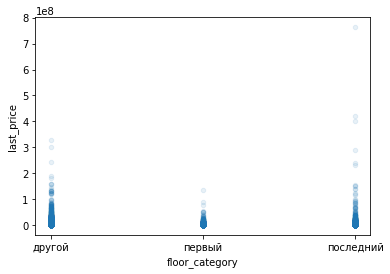

In [422]:
data.plot(x='floor_category', y='last_price', kind='scatter', alpha=0.1)

**Вывод:** Ожидаемо дешевле всего первые этажи, далее последние и в топе "другие"

**4.  Посчитаем стоимости квадратных метров в 10 наиболее популярных населенных пунктах**

In [423]:
locality_best_10 = data['locality_name'].value_counts().head(10)
display(locality_best_10)
data.query('locality_name in @locality_best_10.index').pivot_table(index='locality_name', values='sqm_price').sort_values('sqm_price', ascending=False)

Санкт-Петербург    15719
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

,sqm_price
locality_name,
Санкт-Петербург,114850.160718
Пушкин,103125.819377
Кудрово,95324.930508
Парголово,90175.913089
Мурино,86087.512017
Шушары,78677.364318
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


**Вывод:** Ожидаемо самые дорогие метры в Санкт-Петербурге, а самые дешевые в среднем из этой десятки оказались в Выборге

**5.  Исследуем зависимость стоимости объектов в Санкт-Петербурге от расстояния до центра города** 

,city_centers_km,nunique_last_price,median_last_price
0,0.0,24,17900000
1,1.0,149,11395000
2,2.0,191,10000000
3,3.0,217,8409000
4,4.0,366,9200000
5,5.0,495,9500000
6,6.0,398,8900000
7,7.0,276,7800000
8,8.0,383,7450000
9,9.0,297,5300000


'Средняя стоимость одного километра приближения к ценрту равна: 607500'

<AxesSubplot:xlabel='city_centers_km'>

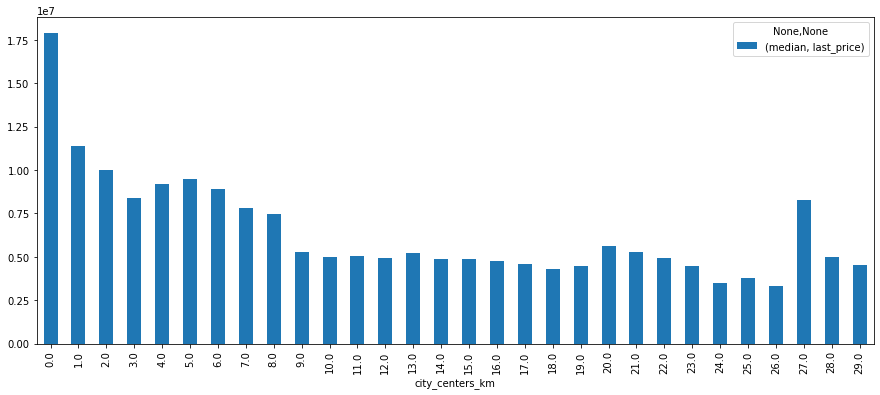

In [424]:
import numpy as np

city_centers_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_km', values='last_price', aggfunc=[pd.Series.nunique, np.median]).reset_index() #.sort_values('sqm_price', ascending=False)
city_centers_km.columns = ['_'.join(col).rstrip('_') for col in city_centers_km.columns.values]
display(city_centers_km)
city_centers_km_price = (city_centers_km.loc[0, 'median_last_price'] - city_centers_km.loc[26, 'median_last_price']) / city_centers_km.loc[0, 'nunique_last_price']
display(f'Средняя стоимость одного километра приближения к ценрту равна: {city_centers_km_price.astype(int)}')

data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_km', values='last_price', aggfunc=[np.median]).plot(xlim=(0, 26), kind='bar', figsize=(15, 6))


**Вывод:** Выборки по 27 - 29 км от центра слишком малы, чтобы на них полагаться, поэтому возьмем диапазон от 0 км (то есть ценра до 26км от него). Как распределены шаги между медианными значениями цен по каждому километру можно судить по графику. Среднюю же стоимость километра для простоты определим как среднее арифметическое (см. расчеты и вывод результата выше).

### Общий вывод

**Главное, от чего зависит стоимость недвижимости при прочих равных - это расположение. Стоимость кв.м. в Санкт-Петербурге ожидаемо выше, чем в пригороде. В рамках же самого города, естественно стоимость метра растет по мере приближения к центру города. В одном и том же месте недвижимость будет тем дороже, чем выше площадь квартиры (самая сильная линейная связь), жилая площадь, площадь кухни (это если говорить о полной стоимости, а если о цене квадратного метра, то наоборот, площадь кухни влияет сильнее, чем общая и жилая площади), далее количество комнат, этаж и его тип. Год, месяц и день недели на фоне всего перечисленного выше практически не влияет, однако если эти показатели сравнивать, то степень влияния уменьшается именно в таком порядка: от года к дню недели. Если условия в объявлении адекватны рынку, то квартира скорее всего уйдет за первые 2 месяца, далее вероятность уже пойдет на спад. Ну и лучше продать до мая или уже начинать с сентября, чтобы было больше шансов.**